In [2]:
from sage.all import *
import time
import random 
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy import primerange, nextprime

In [58]:
def random_SL2F_p(p,word_length):
    R = IntegerModRing(p)
    X = Matrix([[R(1), R(1)], [R(0), R(1)]])
    Y = Matrix([[R(1), R(0)], [R(1), R(1)]])
    M = Matrix([[R(1), R(0)], [R(0), R(1)]])
    N = [[],[]]
    for _ in range(word_length):
        mat = random.choice([X, Y])
        M = M * mat
    N[0] = list(M[0])
    N[1] = list(M[1])
    return N

def CheckEven(n):#偶数かどうかを判定。偶数だったらTrue
    if n & 1 == 0:
        return True
    else:
        return False

def CheckPrime(n):#素数かどうか判定。素数だったらTrue
    if n == 2: return True
    if n <= 1 or CheckEven(n):return False

    d = (n - 1) >> 1
    while CheckEven(n):
        d >>= 1

    for i in range(100):
        a = random.randint(1,n-1)
        t = d
        y = pow(a,t,n)

        while t != n -1 and y != 1 and y != n - 1:
            y = pow(y,2,n)
            t <<= 1
        
        if y != n - 1 and CheckEven(t):
            return False

    return True


def GetRandomPrime(max):#max未満のランダムな素数を返す。存在しない場合は-1を返す
    if(max <= 1):return -1
    
    while(True):
        rand = random.randint(2,max)
        if(CheckEven(rand)):rand += 1
        if(CheckPrime(rand)):break
    
    return rand

def GetRandomPrimeSameMagnitude(n): #nと同じ桁のランダムな素数を返す。存在しない場合は-1を返す
    if(n <= 1):return -1
        
    k = len(bin(n)) - 2 #kはnの2進桁数
    while(True):
        rand = random.randint(2**(k - 1),2**k)
        if(CheckEven(rand)):rand += 1
        if(CheckPrime(rand)):break
    
    return rand


print(GetRandomPrime(2**256))

14314008126409311636940187428523598482615739950213784158269381728551527625419


In [4]:
p = 66581209722551453593985390473308943703196134796357813243939566278615782966563
while(True):
    p_1 = GetRandomPrimeSameMagnitude(p)
    c = random.randint(2,p_1)
    R = IntegerModRing(p_1)
    k = R(c) ** 2 * R(p) ** 2 + 4 * R(c)
    if kronecker(int(k),p_1) == 1:
        break
print(k,c,p_1)

1463645761286808854174140680909095550725116305308742411504953239310315755962 4363702587980066021824258175656839050073465968442721642176586486680619075561 100269093380655736463499204377801387918476608832040219428083446495689386310991


In [5]:
def Legendre(n,p): 
    if p == 2:
        return True
    n = n % p
    k = list(bin(int((p - 1)/2))[2:])
    l = 1
    while(True):
        if k[-1] == "1":
            l = (l * n) % p
            k[-1] = "0"
        if k[-1] == "0":
            n = (n ** 2) % p
            del k[-1]
        if len(k) == 1:
            l = (l * n) % p
            break
    if l == 1: return 1
    else: return -1

Legendre(132685491577370824812191870474466979840791369529189486746965376814343438877113,163224041900145744191970993029056722186065388406656192214196400467815853979839)
kronecker(132685491577370824812191870474466979840791369529189486746965376814343438877113,163224041900145744191970993029056722186065388406656192214196400467815853979839)

1

In [48]:
def LiftIndentity(p):
    while(True):
        if p <= 3:
            return "not prime"
        p_1 = GetRandomPrimeSameMagnitude(p)
        c = random.randint(2,2**5)
        R = IntegerModRing(p_1)
        D = int((R(c)**2)*(R(p)**2) + 4*R(c))
        if kronecker(int(D),p_1) == 1 and int(c*p + mod(D,p_1).sqrt()) % 2 == 0:
            break

    k_1 = int((c*p + mod(D, p_1).sqrt()))//2
    k_2 = (c + c*p*k_1 - k_1**2)//p_1
    k_3 = p_1
    k_4 = c*p - k_1
    return [[1+k_1*p,k_2*p],[k_3*p,1+k_4*p]]
    
p = GetRandomPrimeSameMagnitude(10000000000000000000)
print(p)
LiftIndentity(3)

10035703102468406203


'not prime'

In [108]:
#Euclidの互除法を用いた攻撃方法
def lift(p,M): #M \in SL(2,F_p),pは素数
    if type(M[0][0]) == str:
        return "inadequate"
    else:
        for i in range(2):
            for j in range(2):
                M[i][j] = int(M[i][j])
                
    a, b, c, d = 0, 0, 0, 0
    for i in range(2):
        if gcd(M[i][i],M[0][1]) == 1:
            a, b = M[i][i], M[0][1] 
            c, d = M[1 - i][1 - i], M[1][0]
            j = 0
            break
        elif gcd(M[i][i],M[1][0]) == 1:
            a, b = M[i][i], M[1][0]
            c, d = M[1 - i][1 - i], M[0][1]
            j = 1
            break
        if i == 1:
            if M[0][1] != 0:
                M[0][0] = M[0][0] + int(coprimalize(p,M[0][0],M[0][1]) * p)
                return lift(p,M)
            else:
                M[0][1] = p
                return lift(p,M)
    k = int((M[0][0] * M[1][1] - M[0][1] * M[1][0] - 1) / p)
    s, t = sympy.gcdex(int(a),-int(b))[0], sympy.gcdex(int(a),-int(b))[1]
    s = s * (-k)
    t = t * (-k)
    c = int(c + s * p)
    d = int(d + t * p) #Z上に持ち上げ完了
    if b != 0 and a != 0:
        l = min(c // (b * p), d // (a * p))
    else: l = 0   
    if l < 0:
        c = c - l * b * p
        d = d - l * a * p
    M[1 - i][1 - i] = c
    M[1 - j][j] = d
    return M

def decrypt_Euclid(M,que): #M[0][0]は0でない
    if type(M[0][0]) == str:
        return "inadequate"
    else:
        for i in range(2):
            for j in range(2):
                M[i][j] = int(M[i][j])
    if M[1][0] == 0:
        que.extend(["X"] * M[0][1])
        return "".join(que)
    if M[0][1] == 0:
        que.extend(["Y"] * M[1][0])
        return "".join(que)
    if M[1][0] == 1:
        q = M[0][0] // M[1][0]
        M[0][0] = 1
        M[0][1] = M[0][1] - (q - 1) * M[1][1]
        que.extend(["X"] * (q - 1))
        if M[0][1] == 0:
            que.append("Y")
        else:
            que.append("Y")
            que.extend(["X"] * (M[0][1]))
        return "".join(que)
        
    if M[0][0] >= M[1][0]:
        q = M[0][0] // M[1][0]
        M[0][0] = M[0][0] - q * M[1][0]
        M[0][1] = M[0][1] - q * M[1][1]
        que.extend(["X"] * q)
        return decrypt_Euclid(M,que)
    if M[1][0] >= M[0][0]:
        q = M[1][0] // M[0][0]
        M[1][0] = M[1][0] - q * M[0][0]
        M[1][1] = M[1][1] - q * M[0][1]
        que.extend(["Y"] * q)
        return decrypt_Euclid(M,que)

def decrypt_brute_force_Zemor(p,M):
    if p < 2:
        return "not prime"
    R = IntegerModRing(p)
    X = Matrix([[R(1),R(1)],[R(0),R(1)]])
    Y = Matrix([[R(1),R(0)],[R(1),R(1)]])
    for i in range(2**1,2**256):
        E = Matrix([[R(1),R(0)],[R(0),R(1)]])
        binary = bin(i)[3:]
        que = []
        for j in range(len(binary)):
            if binary[j] == "1":
                E = E * X
                que.append("X")
            else: 
                E = E * Y
                que.append("Y")
        if E == M:
            return "".join(que)
    return "intractable to factor"

print(decrypt_Euclid(LiftIndentity(3),[]))


inadequate


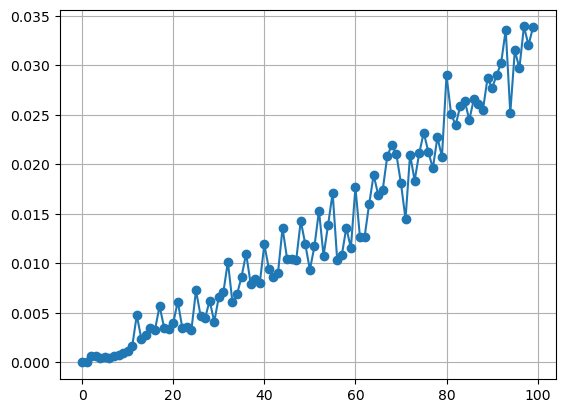

In [53]:
#Lifting Attackの計算量
ExponentsList = list(range(100))
time_list = []
k = 100
for i in ExponentsList:
    x = 0
    for _ in range(k):
        p = GetRandomPrimeSameMagnitude(2**i)
        
        start = time.perf_counter()
        M = LiftIndentity(p)
        decrypt_Euclid(M,[])
        end = time.perf_counter()
        x = x + end - start
    
    time_list.append(x/k)

plt.plot(ExponentsList, time_list, marker='o')
plt.xlabel("")
plt.ylabel("")
plt.grid(True)
plt.show()

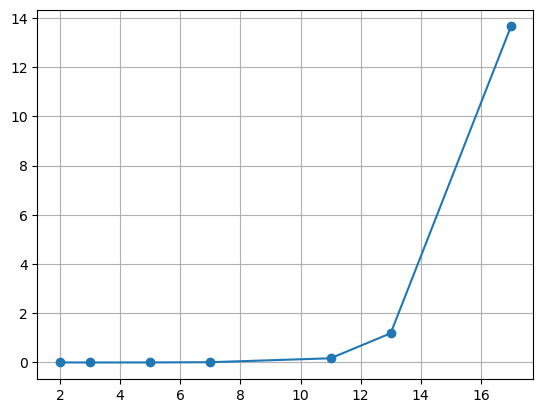

In [13]:
#総当たり攻撃の計算量

PrimeList = [2,3,5,7,11,13,17]
ExponentsList = list(range(5))
time_list = []
k = 1
for p in PrimeList:
    x = 0
    for _ in range(k):        
        start = time.perf_counter()
        decrypt_brute_force_Zemor(p,Matrix([[1,0],[0,1]]))
        end = time.perf_counter()
        x = x + end - start
    
    time_list.append(x/k)

plt.plot(PrimeList, time_list, marker='o')
plt.xlabel("")
plt.ylabel("")
plt.grid(True)
plt.show()


In [45]:
decrypt_brute_force_Zemor(17,Matrix([[1,0],[0,1]]))

'YYXYYXYYXXYXXYXX'

In [23]:
#a + kp = 1 (mod b)なるkを探索
def coprimalize(p,a,b):
    a = a % b
    p = p % b
    k = sympy.gcdex(int(p),-int(b))[0] % b
    return int(k * (1 - (a % b))) % b


#MをSL(2,Z+)にリフトする
def lift(p,M): #M \in SL(2,F_p),pは素数
    a, b, c, d = 0, 0, 0, 0
    for i in range(2):
        if gcd(M[i][i],M[0][1]) == 1:
            a, b = M[i][i], M[0][1] 
            c, d = M[1 - i][1 - i], M[1][0]
            j = 0
            break
        elif gcd(M[i][i],M[1][0]) == 1:
            a, b = M[i][i], M[1][0]
            c, d = M[1 - i][1 - i], M[0][1]
            j = 1
            break
        if i == 1:
            if M[0][1] != 0:
                M[0][0] = M[0][0] + int(coprimalize(p,M[0][0],M[0][1]) * p)
                return lift(p,M)
            else:
                M[0][1] = p
                return lift(p,M)
    k = int((M[0][0] * M[1][1] - M[0][1] * M[1][0] - 1) / p)
    s, t = sympy.gcdex(int(a),-int(b))[0], sympy.gcdex(int(a),-int(b))[1]
    s = s * (-k)
    t = t * (-k)
    c = int(c + s * p)
    d = int(d + t * p) #Z上に持ち上げ完了
    if b != 0 and a != 0:
        l = min(c // (b * p), d // (a * p))
    else: l = 0   
    if l < 0:
        c = c - l * b * p
        d = d - l * a * p
    M[1 - i][1 - i] = c
    M[1 - j][j] = d
    return M
print(lift(17,[[3,0],[3,6]]))
print(lift(51749, [[32871, 49890], [47856, 42654]]))
print(lift(11, [[32871, 49890], [47856, 42654]]))
print(lift(51749,[[30021,9980],[5792,8574]]))


[[3, 17], [37, 210]]
[[2208680191, 49890], [74282332227983, 1677900481]]
[[349231, 49890], [349245, 49892]]
[[30021, 9980], [414567031, 137816161]]


In [50]:
import numpy as np

def random_SL(n, p, steps=100):
    """
    n: 行列のサイズ
    p: 素数（計算は mod p）
    steps: 行の加算操作を行う回数（多くするほど多様な行列が得られます）
    """
    # 単位行列を作成（mod p での演算のために整数型）
    A = np.eye(n, dtype=int)
    for _ in range(steps):
        # 2つの異なる行 i, j をランダムに選ぶ
        i, j = np.random.choice(n, 2, replace=False)
        # 0 から p-1 の範囲でランダムな整数を選ぶ
        a = np.random.randint(0, p)
        # 行 i に行 j の a 倍を加える操作（mod p）
        A[i, :] = (A[i, :] + a * A[j, :]) % p
    return A

# 例: 4×4の行列で p=7 の場合
n = 2
p = 7
matrix = random_SL(n, p)
print("生成された行列:")
print(matrix)


生成された行列:
[[1 3]
 [4 6]]


In [59]:
random_SL2F_p(GetRandomPrimeSameMagnitude(2**100),200)

[[312627114986868188007131804150, 155280747742461888434157519371],
 [2356449429711680826791502201802, 57461197583355627181612874030]]

In [126]:
p = GetRandomPrimeSameMagnitude(2**10)
X = random_SL2F_p(p,100)
print(p,X)
M = lift(p,X)
print(M)
decrypt_Euclid(M,[])

1427 [[279, 247], [547, 740]]
[[279, 247], [4352897, 3853640]]


'YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY

In [124]:
lift(1283,[[659, 298], [732, 808]])

[[659, 298], [742306, 335671]]